# Accessing SDumont using Jupyter Notebook

*Last edited: 2022-04-07*

Based on: https://sites.usp.br/cadase/recursos-computacionais/tutoriais-sdumont/ (in Portuguese)

The purpose of this document is to describe how SDumont is accessed using [Jupyter Notebook (JN) / Juypter Lab](https://jupyter.org/), and to show some usage tips.

The JN web application is based on a client-server framework, which allows you to use it on a single machine, or on two machines allowing code to be executed on one of them, and viewing and editing on another. This way you can work on your personal laptop and run code on a remote machine (SDumont). Thus, it is not necessary to use, for example, the SSH shell and the command line in the traditional way to compile, run, and get results on the remote machine. Everything is done using the JN interface. JN can be used as a single standardized interface for local and remote machines. The idea behind development using JN in SDumont, I think, is that most of development work is done on the personal laptop, and then SDdumont is used to compile the final code, run it, and get the results, all using the JN environment. Only work that is computationally intensive and requires performance is done at SDumont. The analysis of the obtained data, generation of graphics and documentation is also done on the personal laptop, using the same JN environment. What changes is that one machine will be in a tab of the web browser, and the other machine will be in another tab of the web browser. Different machines will be on different tabs of the web browser. It is important to note that despite using the web browser, it is not necessary to be connected to the internet when running the JN locally. I think that perhaps the best way to use JN is to run two Notebook Servers (NS), one running permanently on the laptop, and the other running eventually on SDumont just to send jobs and then again to get the results. Tasks that are not computationally intensive are performed on the laptop (local machine). JN uses a file in the text format with a .ipynb extension that can be configured to be automatically saved. This file can be copied to the local machine, viewed and edited, both in JN and in a regular text editor. This way it is not necessary to be permanently connected to SDumont. Copying files between machines can also be done via GUI, using, for example, the Dolphin file manager and the fish protocol. Another way, perhaps even better, depending on the situation, can be to use sshfs to mount a remote file system and use JN to make the copy, although in some cases this can cause some confusion (this case is discussed later).

## Account

The following text assumes that you already have an SDumont account. To obtain it, it is necessary to be part of a Brazilian institution, public or private, that supports teaching, research and development activities, and has an approved use proposal (https://sdumont.lncc.br/call.php). Account registration is done by phone and email following the LNCC procedures.

## Connection to SDumont

The examples assume that the following packages are already installed on the local machine:

* anaconda distribution (https://www.anaconda.com/)
* openssh (SSH shell)
* sshpass (optional, to automate the username & password)
* sshfs (optional, to mount remote file system over SSH)

The example operating system is the Fedora 33 KDE Plasma Desktop. First, access will be done via Cisco VPN and then we will use the SSH shell to access the remote machine and start a remote Notebook Server.

We enter the Network Manager, in Configure Network Connections, and then we add a connection

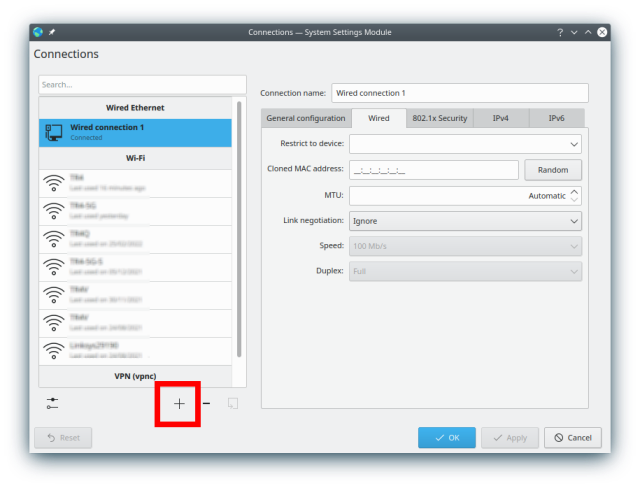

We chose Cisco Compatible VPN (vpnc)

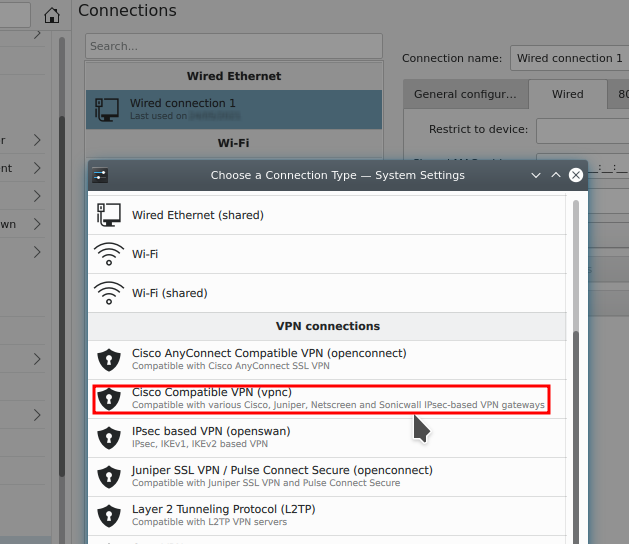!

Settings

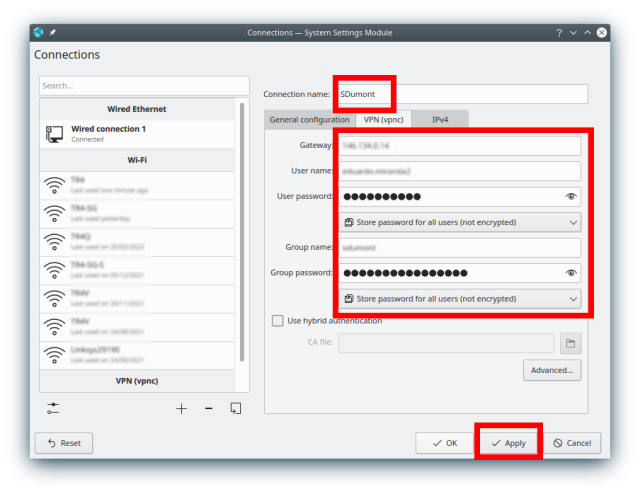

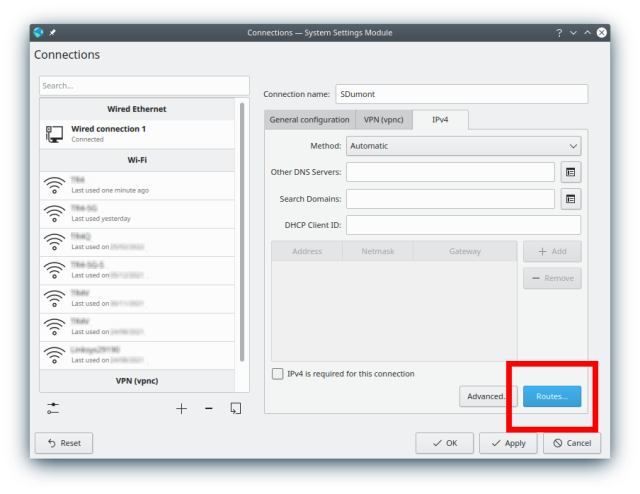

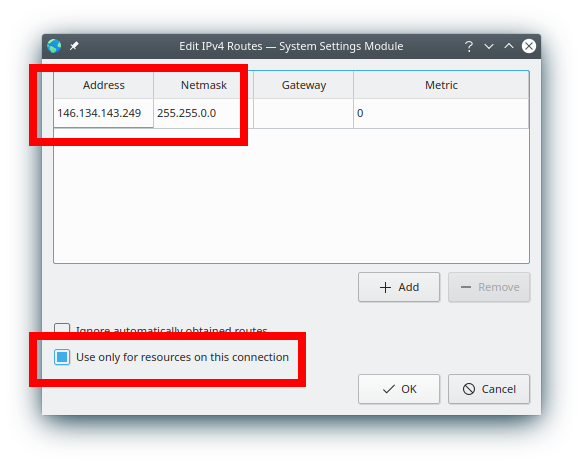

Save the connection. Then, through the network manager, make the connection, and it should appear connected

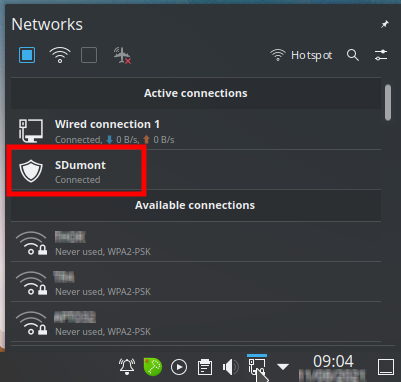

At this point we are on the VPN, and we use the terminal and SSH shell to access a login node. In this example we are using sshpass to automate the SSH username and password, but it is optional

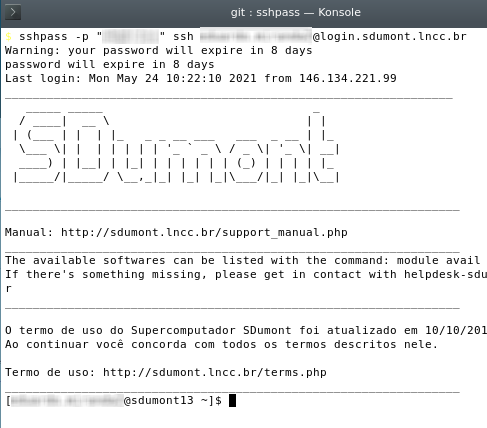

We load the anaconda module and run the NS using the flag `--NotebookApp.token=''` for simplicity, however it is recommended not to use this flag for security reasons. It is important to take note of which login node we are using, in this case it is sdumont13. Port 9000 was chosen for convenience, but it could be another. The use of a login node is only to compile the final code and send it to the execution queue. If you need anything more, it is necessary to allocate a node as described in the SDumont manual (in Portuguese) https://sdumont.lncc.br/support_manual.php

    module load anaconda3/2020.11
    jupyter-lab --no-browser --port=9000 --ip=0.0.0.0 --NotebookApp.token=''

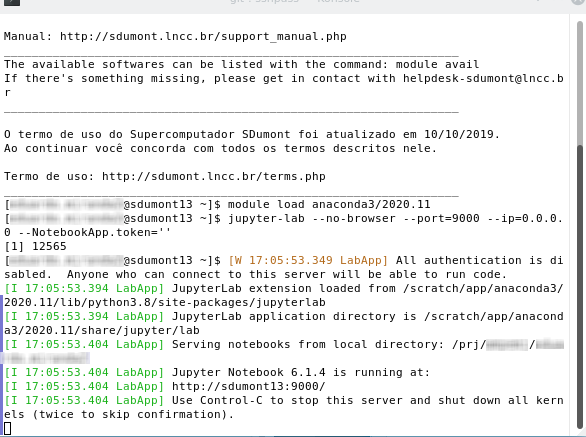

Note the address http://sdumont13:9000 described in the image above, if we had a web browser on the remote machine this would be the address to view the JN. In our case, we will transfer (forward) this port to our local machine so that we can open it in the browser on the local machine. Now let's open a new terminal and use SSH again, but this time to forward port 9000 from the remote machine to the local machine. Here again sshpass is optional

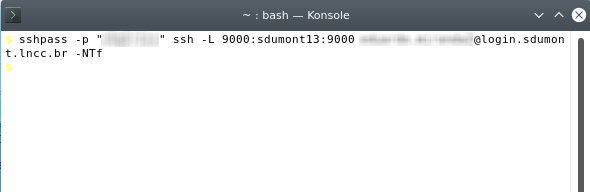

Another way to do this, without having to worry about the login node (sdumont13, etc.), would be to add in ".bashrc", `hostname > hostname_sd.txt`, on the SDumont, and in this way we would have the name of the node in the "hostname_sd.txt" file. Then, on the local machine (laptop), to retrieve the node name, just use `scp sd:hostname_sd.txt .` to copy the hostname_sd.txt file to the current directory on the local machine. In this case, the "sd" in "sd:hostname_sd.txt" would be the configuration in ssh in ".ssh/config" with the host and user name. Once copied to the local machine, to create an environment variable "HOSTNAME_SD" with the node name, just use `export HOSTNAME_SD=$(cat hostname_sd.txt)`. And finally, to transfer the port, we would use `ssh sd -L 9000:$HOSTNAME_SD:9000 -NTf`. There are several ways to automate this process so that you don't have to type these commands every time you need to.

At this point it is possible to access the remote machine using JN. Just enter the address http://localhost:9000 in your web browser. Note the two tabs, on one of them we have JN running on the local machine (using a different port), and on the other, JN running on the remote machine. The JN on the local machine uses a NS also running on the local machine, and the JN running on the remote machine uses a NS running on the remote machine. The code "hello, world" was executed on the remote machine (login node sdumont13). Please note that JN is not limited to Python, for example it could be using Fortran or C

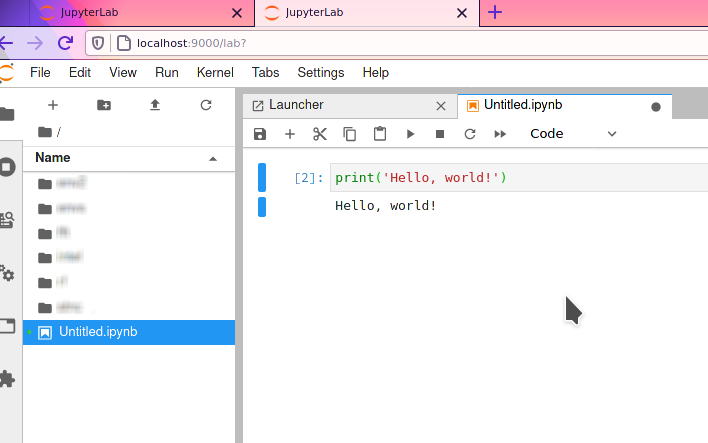

Using the two tabs in this way, it is possible to develop the code on the local machine, and use the remote machine only to compile the final code and send it to the execution queue (and get the results after running). And if sshfs is being used, files from the remote machine can also be manipulated in JN. Care must be taken with sshfs, because although it can be used to access and work with files on the other machine using JN, in this case the code is not run on the remote machine, and can generate a false impression that it is running. To avoid this type of problem, it may be better not to use sshfs, or at least not to use it with JN, it may even be easier for Dolphin (and fish) to copy, move and perform other operations with files, and this way to make work separate and less subject to problems. Obviously, everyone should have their own opinion about the best way to use it.

If by any chance the connection drops during the use of JN, just connect and load the NS again, the JN client keeps what was being done. It is also a good idea to turn on the Autosave Documents option.

A characteristic of JN is that it makes the directory in which the NS is running "root", so for example, if the NS was called in /prj/project/user/foo/ directory, JN will show this directory as `/` and the one above is not easily accessible. So it is a good idea to first enter the working directory, and then run the NS in that directory, so only the files that are being worked on appear. If you need to access other files in other paths, you can use sof-links in the directory for that.

To end remote access, first make sure the Notebook is saved, use the File> Shut Down menu, end SSH on the terminal, and disconnect from the network manager. Do not forget to copy the remote files to the local machine, if they do not already exist.